# Tüm Modellerin Karşılaştırılması

**Gerekli Kütüphaneler** 

In [6]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.preprocessing import scale, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [7]:
# Uyarı Mesajları ile Karşılaşmamak için bu kütüphaneyi kullanıyoruz.
from warnings import filterwarnings
filterwarnings("ignore", category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning)

# Veri Seti Hikayesi ve Problemi: Şeker Hastalığı Tahmini

In [8]:
df = pd.read_csv("./diabetes.csv")
# bu csv dosyasının içerisinde eksik gözlemleri(NA) çıkardık.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
y= df["Outcome"]
X = df.drop(["Outcome"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.30,
                                                    random_state = 42)


knn_tuned = KNeighborsClassifier().fit(X_train,y_train)
loj_tuned = LogisticRegression().fit(X_train,y_train)
svm_tuned = SVC().fit(X_train,y_train)
mlpc_tuned = MLPClassifier().fit(X_train,y_train)
cart_tuned = DecisionTreeClassifier().fit(X_train,y_train)
rf_tuned =  RandomForestClassifier().fit(X_train,y_train)
gbm_tuned = GradientBoostingClassifier().fit(X_train,y_train)
catb_tuned = CatBoostClassifier().fit(X_train,y_train, verbose= False)
lgbm_tuned = LGBMClassifier().fit(X_train,y_train)
xgb_tuned = XGBClassifier().fit(X_train,y_train)

C:\Users\halil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[22:16:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\halil\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [30]:
modeller = [
    knn_tuned,
    loj_tuned,
    svm_tuned,
    mlpc_tuned,
    cart_tuned,
    rf_tuned,
    gbm_tuned,
    catb_tuned,
    lgbm_tuned,
    xgb_tuned
]

sonuc = []

sonuclar = pd.DataFrame(columns=["Modeller", "Accuracy"])

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)
    sonuc = pd.DataFrame([[isimler,dogruluk*100]], columns=["Modeller", "Accuracy"])
    sonuclar = sonuclar.append(sonuc)

Text(0.5, 1.0, 'Modellerin Doğruluk Oranları')

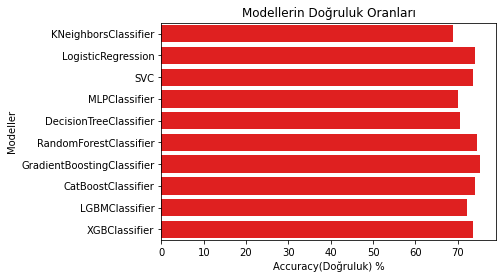

In [31]:
sns.barplot(x="Accuracy", y= "Modeller", data=sonuclar, color="r")
plt.xlabel("Accuracy(Doğruluk) %")
plt.title("Modellerin Doğruluk Oranları")

In [32]:
sonuclar

,Modeller,Accuracy
0,KNeighborsClassifier,68.831169
0,LogisticRegression,74.025974
0,SVC,73.593074
0,MLPClassifier,70.129870
0,DecisionTreeClassifier,70.562771
0,RandomForestClassifier,74.458874
0,GradientBoostingClassifier,75.324675
0,CatBoostClassifier,74.025974
0,LGBMClassifier,72.294372
0,XGBClassifier,73.593074
